# Beer and USA

In [55]:
from src.data.load_data import load_data
import warnings
import matplotlib.pyplot as plt
import numpy as np

In [56]:
warnings.filterwarnings("ignore")
data = load_data(path = 'src/data/', bool_load_txt = False)
warnings.filterwarnings("default")

In [57]:
print(data.keys())

dict_keys(['BeerAdvocate_beers.csv', 'BeerAdvocate_users.csv', 'BeerAdvocate_breweries.csv', 'matched_beer_data_ratings.csv', 'matched_beer_data_users_approx.csv', 'matched_beer_data_users.csv', 'matched_beer_data_beers.csv', 'matched_beer_data_breweries.csv', 'RateBeer_beers.csv', 'RateBeer_users.csv', 'RateBeer_breweries.csv'])


In [59]:
users_matched = data['matched_beer_data_users.csv']
users_ba = data['BeerAdvocate_users.csv']
users_rb = data['RateBeer_users.csv']
users_ba = users_ba.dropna(subset=['location'])
users_rb = users_rb.dropna(subset=['location'])

In [60]:
users_matched_usa = users_matched[users_matched['ba.1'].str.startswith('United States')]
users_ba_usa = users_ba[users_ba['location'].str.startswith('United States')]
users_rb_usa = users_rb[users_rb['location'].str.startswith('United States')]


print(f"Number of matched users in USA: {users_matched_usa.shape[0]}")
print(f"Number of BeerAdvocate users in USA: {users_ba_usa.shape[0]}")
print(f"Number of RateBeer users in USA: {users_rb_usa.shape[0]}")

Number of matched users in USA: 2442
Number of BeerAdvocate users in USA: 113223
Number of RateBeer users in USA: 26855


USA states represented in BeerAdvocate: 50
USA states represented in RateBeer: 50
Number of users per state in BeerAdvocate: location
California        11638
Pennsylvania       8689
New York           7432
Illinois           6866
Massachusetts      6658
Texas              5893
Ohio               4776
Florida            4604
Michigan           4213
New Jersey         3716
Virginia           3604
North Carolina     3405
Washington         2891
Minnesota          2854
Connecticut        2792
Indiana            2644
Georgia            2633
Wisconsin          2375
Maryland           2335
Colorado           2326
Missouri           1703
Oregon             1629
Arizona            1317
South Carolina     1309
Tennessee          1308
Kentucky           1203
New Hampshire      1171
Alabama            1026
Iowa               1010
Maine               888
Vermont             779
Rhode Island        778
Oklahoma            736
Louisiana           732
Kansas              728
Nebraska            496
Ne

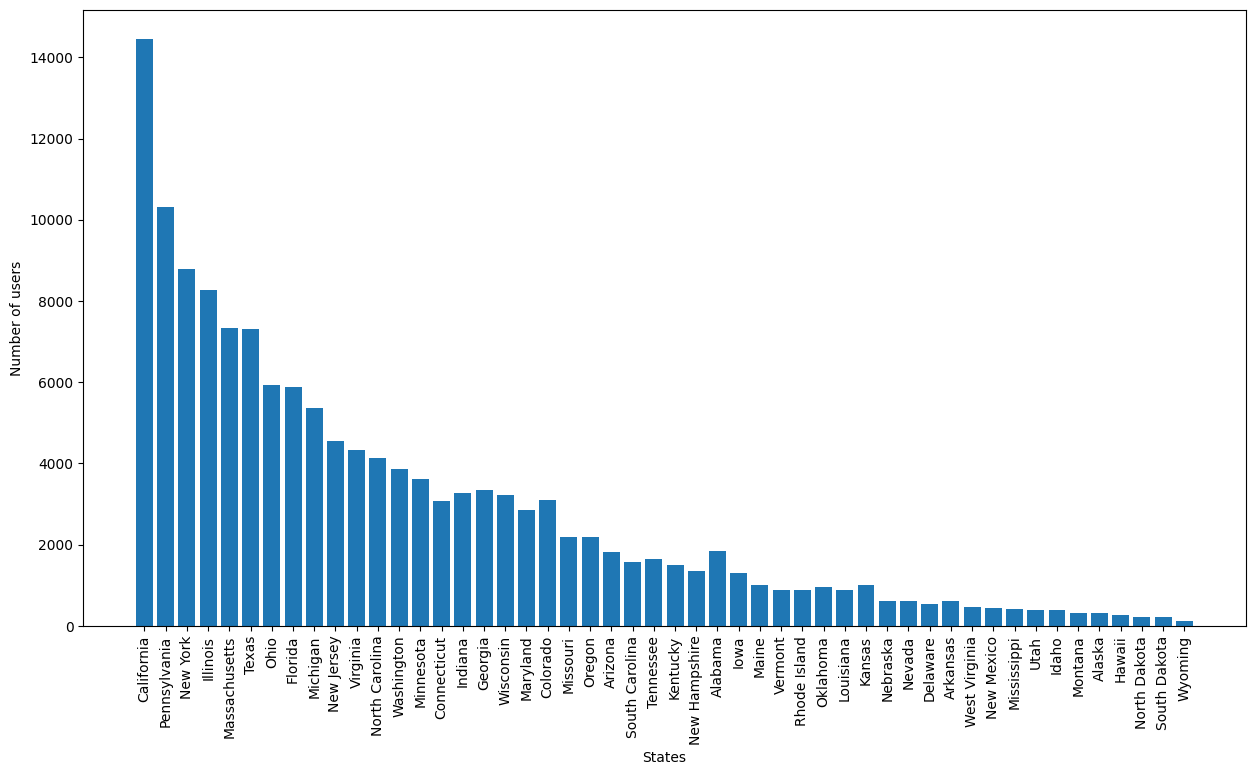

In [69]:
states_usa_ba = users_ba_usa['location'].apply(lambda x: x.split(', ')[1]).unique()
states_usa_rb = users_rb_usa['location'].apply(lambda x: x.split(', ')[1]).unique()

print(f"USA states represented in BeerAdvocate: {len(states_usa_ba)}")
print(f"USA states represented in RateBeer: {len(states_usa_rb)}")

users_per_state_ba = users_ba_usa['location'].apply(lambda x: x.split(', ')[1]).value_counts()
users_per_state_rb = users_rb_usa['location'].apply(lambda x: x.split(', ')[1]).value_counts()

print(f"Number of users per state in BeerAdvocate: {users_per_state_ba}")
print(f"Number of users per state in RateBeer: {users_per_state_rb}")

users_per_state_ba = users_per_state_ba.to_dict()
users_per_state_rb = users_per_state_rb.to_dict()
users_per_state_barb = {k: (users_per_state_ba[k] + users_per_state_rb[k]) for k in users_per_state_ba.keys()}

states = list(users_per_state_barb.keys())
users = list(users_per_state_barb.values())

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(states, users)
ax.set_ylabel('Number of users')
ax.set_xlabel('States')
plt.xticks(rotation=90)
plt.show()

